In [7]:
from astropy.io import ascii
import os
import numpy as np
import pandas as pd
import scipy
import peakutils
import matplotlib.pyplot as plt

In [8]:
#reads/displays ascii formatted txt file and names the dsat "spectra"
spectra=ascii.read("lab0_spectral_data.txt")
print(spectra)

Am-241 Ba-133 Cs-137 Co-60 Eu-152
------ ------ ------ ----- ------
     0      0      0     0      0
     0      0      0     0      0
     0      0      0     0      0
     0      0      0     0      0
     0      0      0     0      0
     0      0      0     0      0
     0      0      0     0      0
     0      0      0     0      0
     0      0      0     0      0
     0      0      0     0      0
   ...    ...    ...   ...    ...
     0      0      0     4      1
     1      2      3     0      3
     0      0      4     1      5
     0      0      1     3      0
     0      2      2     4      5
     0      4      2     4      4
     0      0      2     2      2
     0      0      3     3      7
     0      2      2     1      5
     1      0      0     5      0
     1      2      2     2      1
Length = 8192 rows


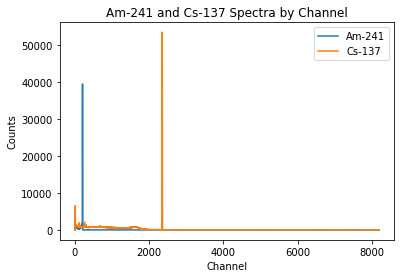

In [16]:
plt.plot(spectra['Am-241'])
plt.plot(spectra['Cs-137'])
plt.title('Am-241 and Cs-137 Spectra by Channel')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.legend()
plt.savefig('images/SpecUncal')
plt.show()

In [4]:
#Peak finding script - from https://gist.github.com/endolith/250860
import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array

def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)

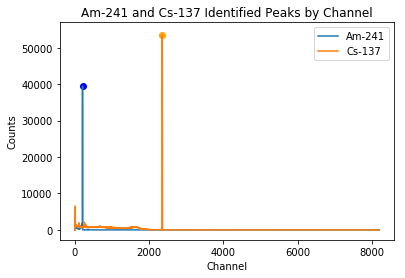

[[  208 39451]]
[[ 2354 53433]]


In [17]:
#Finds and plots peaks for Cs-137 and Am-241
AmPeak, mintab = peakdet(spectra['Am-241'],39000)
CsPeak, mintab = peakdet(spectra['Cs-137'],39000)
plt.plot(spectra['Am-241'])
plt.plot(spectra['Cs-137'])
plt.scatter(array(AmPeak)[:,0], array(AmPeak)[:,1], color='blue')
plt.scatter(array(CsPeak)[:,0], array(CsPeak)[:,1], color='orange')
plt.title('Am-241 and Cs-137 Identified Peaks by Channel')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.legend()
plt.savefig('images/Peaks')
plt.show()
print(AmPeak)
print(CsPeak)

Object `plt.label` not found.
